In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics

with open("datafile.csv") as file_name:
    dataarray = np.loadtxt(file_name, delimiter=", ", skiprows=1)

df = pd.read_csv("datafile.csv")
df.head()

,Event,mu_E,mu_Px,mu_Py,mu_Pz,B1_E,B1_Px,B1_Py,B1_Pz,B2_E,...,J1_Py,J1_Pz,J2_E,J2_Px,J2_Py,J2_Pz,J3_E,J3_Px,J3_Py,J3_Pz
0,0,51268.2,23427.4,-30694.4,33725.70,144539.0,30556.9,-124646.0,66221.10,41345.7,...,83141.7,100690.0,153528.0,24049.1,36265.6,-147189.0,62572.0,-33733.80,-15020.8,-50334.600
1,8,62607.2,-55928.2,-27403.4,-6382.09,143720.0,-90881.3,80127.7,-76677.30,63423.3,...,44228.2,104774.0,49101.6,37159.0,-12960.1,-28853.1,31804.9,-28743.60,11803.6,-203.991
2,41,175318.0,110076.0,-128700.0,45341.20,209660.0,-110486.0,118174.0,-132929.00,54280.7,...,35725.8,-14619.2,82184.9,32212.0,13286.3,-73960.8,68410.5,8936.84,32453.5,59377.200
3,44,125126.0,32677.8,102847.0,63335.10,75826.2,-60117.0,-44410.6,1588.44,78404.3,...,62414.2,-24681.6,85371.5,-40072.9,-22510.0,71706.7,112722.0,19212.20,-19288.7,-109245.000
4,52,81170.1,45960.6,-38977.6,-54377.80,209614.0,-41145.2,31890.1,-202909.00,126913.0,...,62056.2,-110476.0,168499.0,14308.5,42066.1,-162219.0,55170.7,9476.58,-26691.3,46793.300


Mean m12:  81.18074164591046
Mean m13:  81.68432650356482
Mean m23:  78.58913503350712


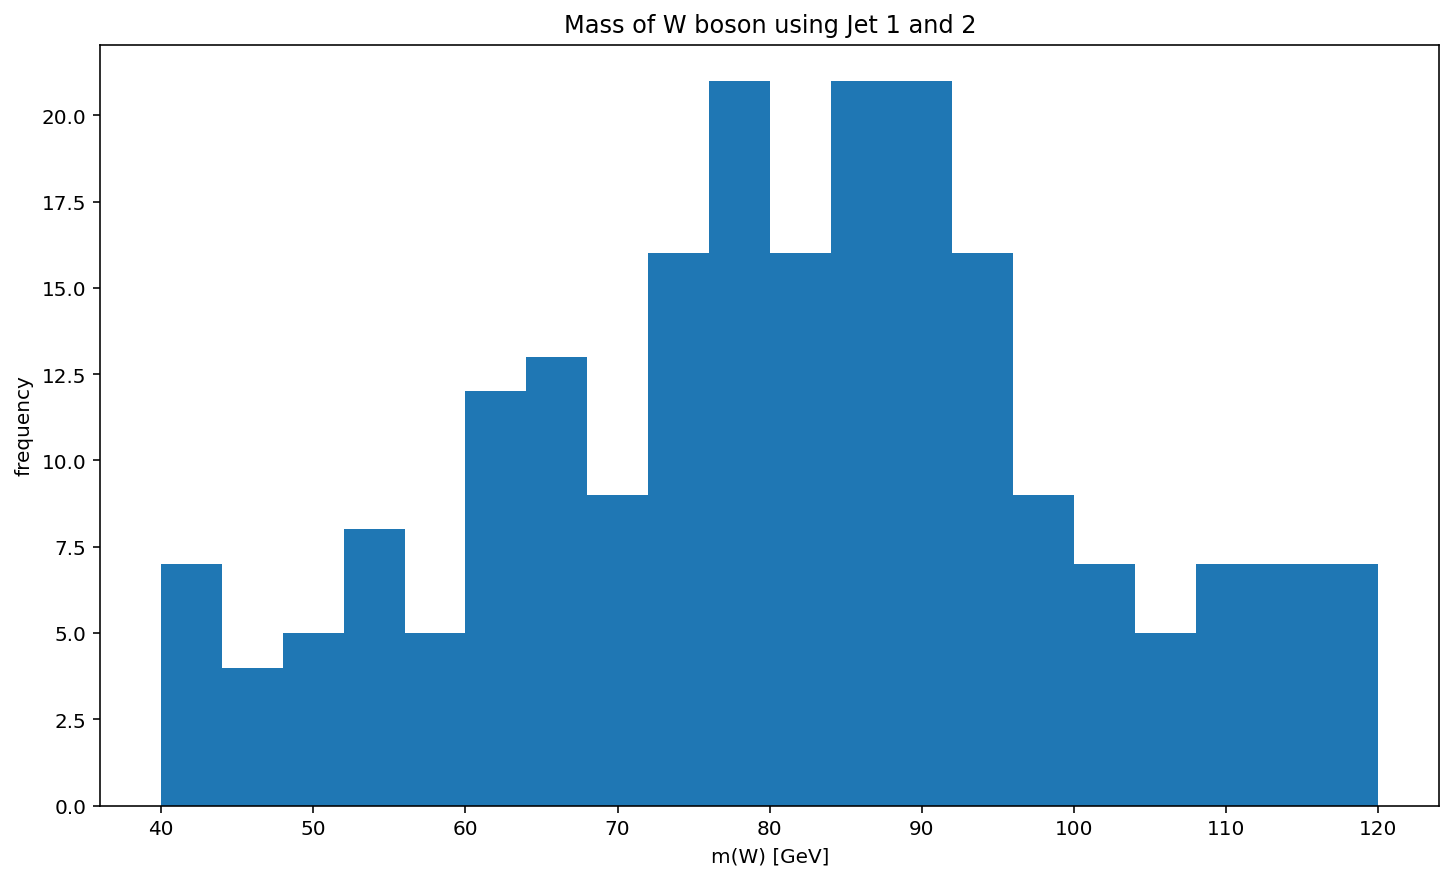

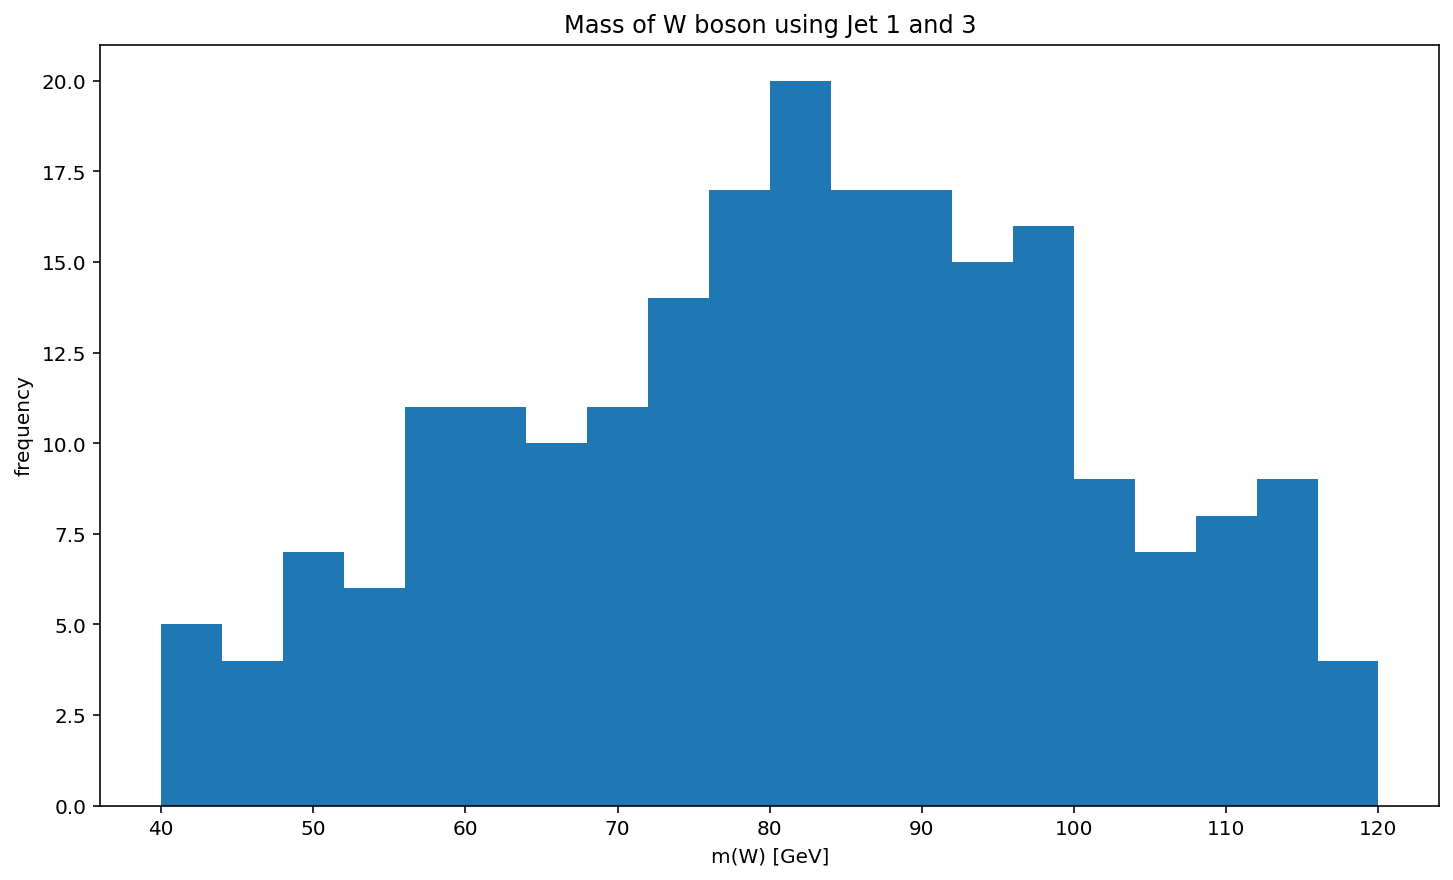

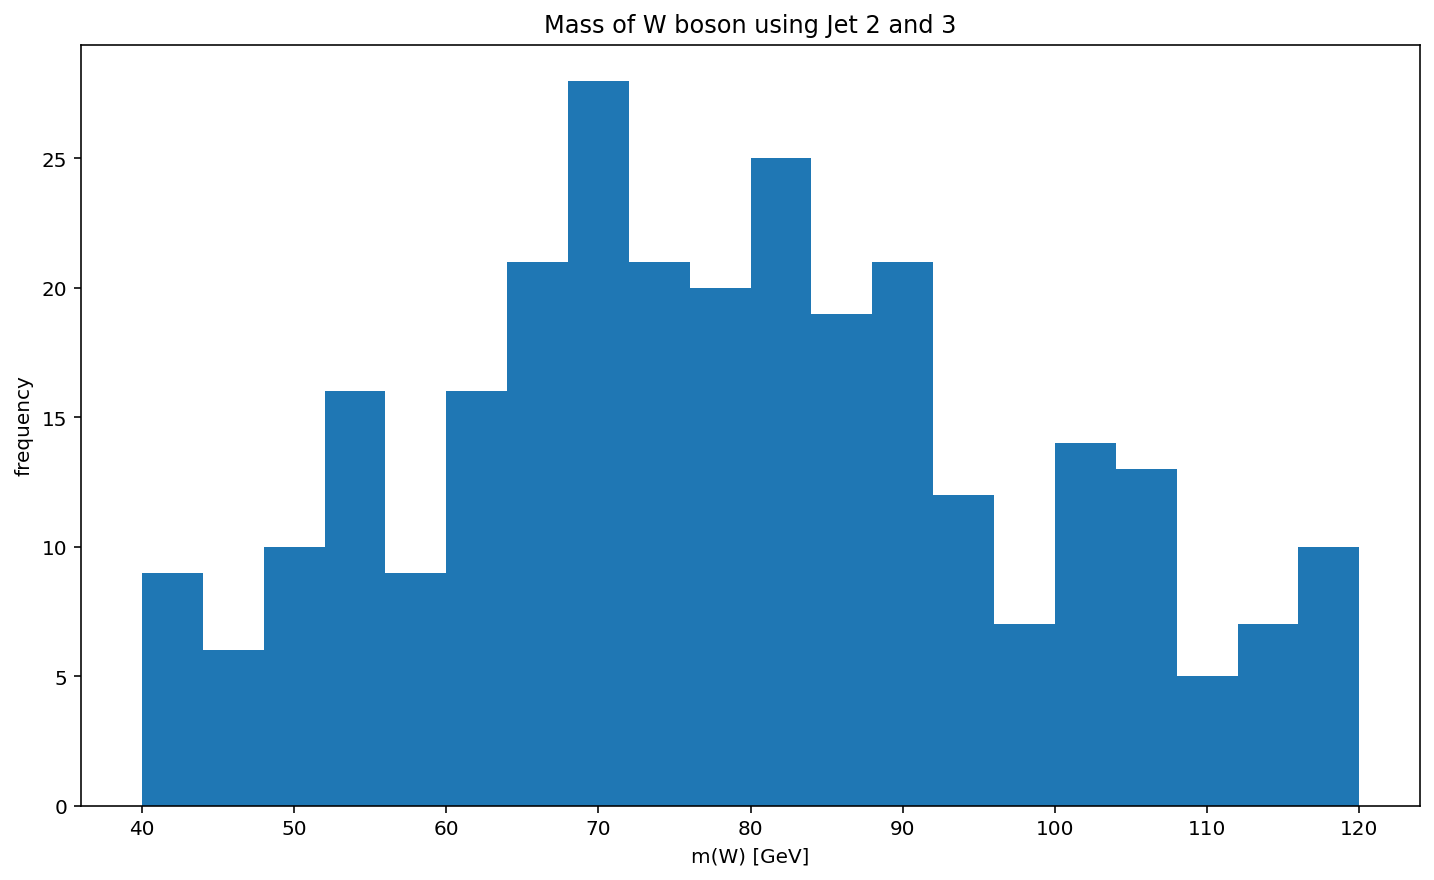

In [3]:
mwlist = []
mwlist_2 = []
mwlist_3 = []

for line in dataarray:

    m12 = np.sqrt((line[13]+line[17])**2 - (line[14]+line[18])**2 - (line[15]+line[19])**2 - (line[16]+line[20])**2)/1000
    if abs(m12-80)<40:
        mwlist.append(m12)

for line in dataarray:

    m13 = np.sqrt((line[13]+line[21])**2 - (line[14]+line[22])**2 - (line[15]+line[23])**2 - (line[16]+line[24])**2)/1000
    if abs(m13-80)<40:
        mwlist_2.append(m13)

#A loop to find values close to 80
for line in dataarray:

    m23 = np.sqrt((line[17]+line[21])**2 - (line[18]+line[22])**2 - (line[19]+line[23])**2 - (line[20]+line[24])**2)/1000
    if abs(m23-80)<40:
        mwlist_3.append(m23)

#Calculates the mean
mean = np.mean(mwlist)
print('Mean m12: ', mean)

mean2 = np.mean(mwlist_2)
print('Mean m13: ', mean2)

mean3 = np.mean(mwlist_3)
print('Mean m23: ', mean3)


plt.hist(mwlist, bins=20, range=(40,120), label="m(W) [GeV]")
plt.xlabel("m(W) [GeV]")
plt.ylabel("frequency")
plt.title("Mass of W boson using Jet 1 and 2")
plt.savefig('MW.png')
plt.show()

plt.hist(mwlist_2, bins=20, range=(40,120), label="m(W) [GeV]")
plt.xlabel("m(W) [GeV]")
plt.ylabel("frequency")
plt.title("Mass of W boson using Jet 1 and 3")
plt.savefig('MW2.png')
plt.show()

plt.hist(mwlist_3, bins=20, range=(40,120), label="m(W) [GeV]")
plt.xlabel("m(W) [GeV]")
plt.ylabel("frequency")
plt.title("Mass of W boson using Jet 2 and 3")
plt.savefig('MW3.png')
plt.show()

Mean b1m12:  188.9228820691604
Mean b2m12:  174.37109069219977


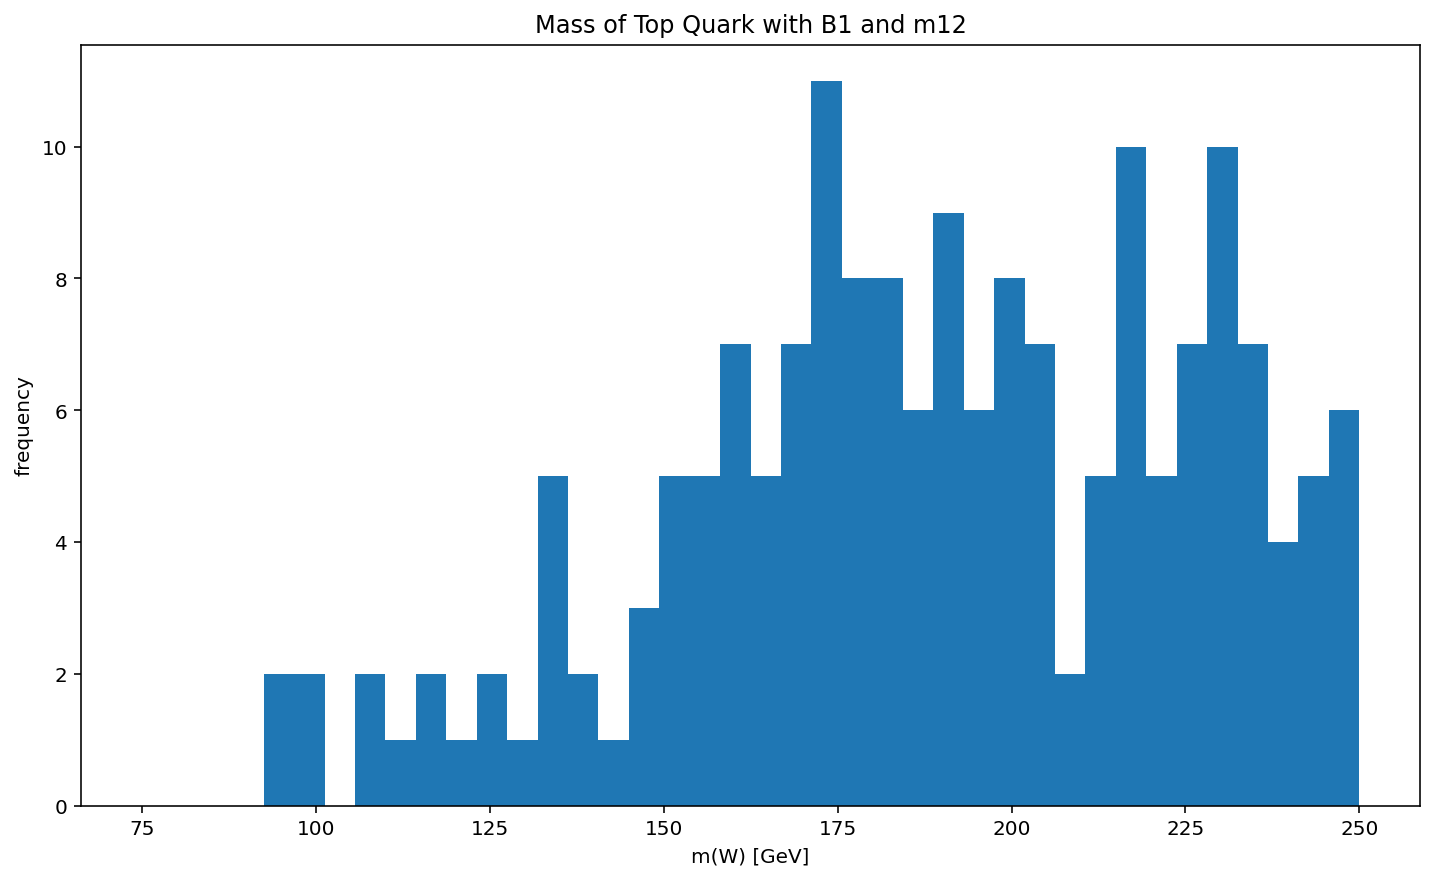

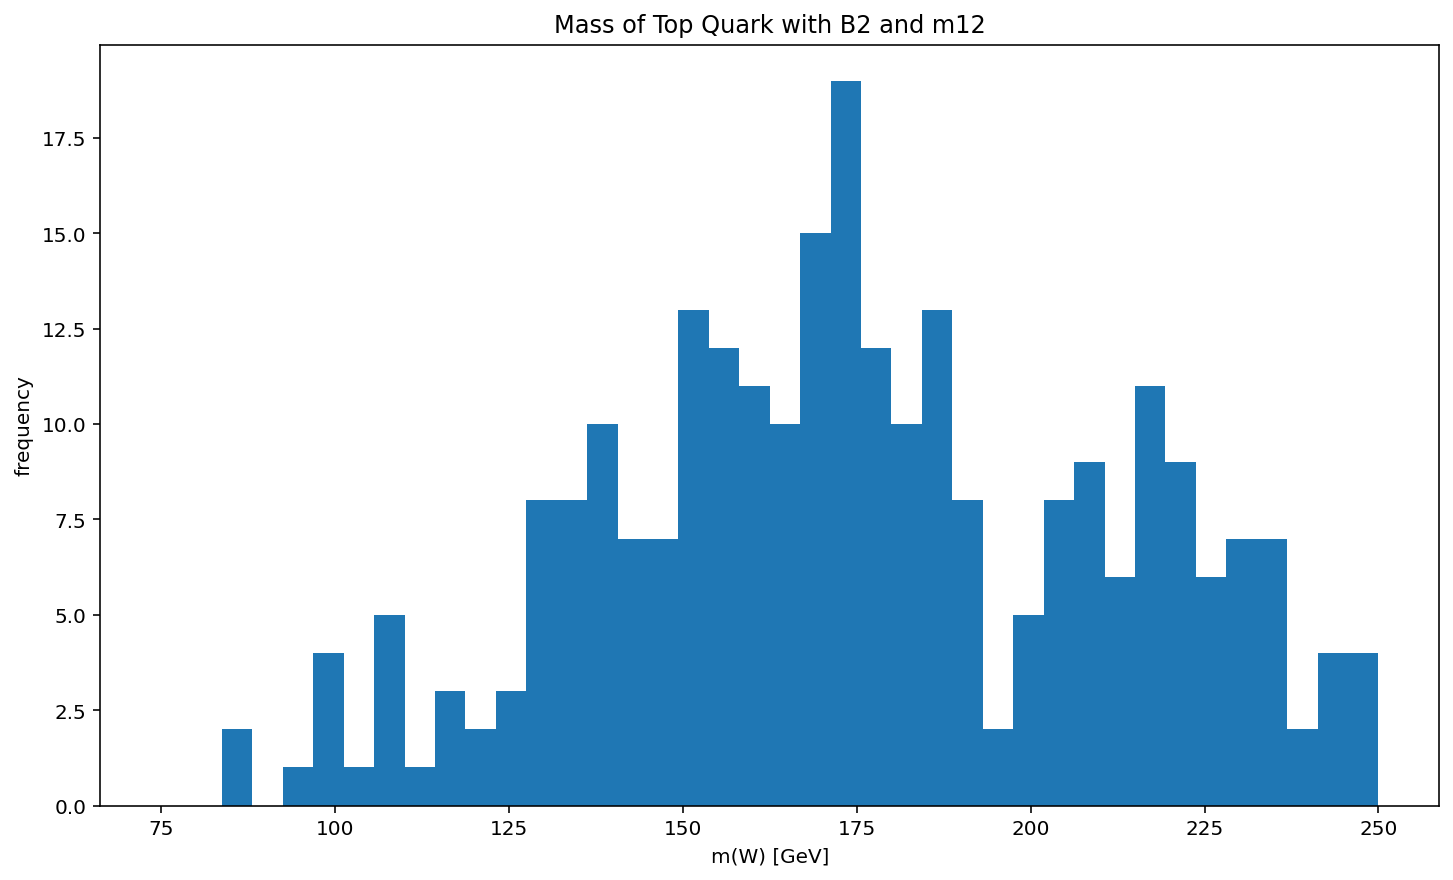

In [14]:
mwlist_4 = []
mwlist_5 = []

for line in dataarray:

    b1m12 = np.sqrt((line[5]+line[13]+line[17])**2 - (line[6]+line[14]+line[18])**2 - (line[7]+line[15]+line[19])**2 - (line[8]+line[16]+line[20])**2)/1000
    if abs(b1m12)<250:
        mwlist_4.append(b1m12)

for line in dataarray:

    b2m12 = np.sqrt((line[9]+line[13]+line[17])**2 - (line[10]+line[14]+line[18])**2 - (line[11]+line[15]+line[19])**2 - (line[12]+line[16]+line[20])**2)/1000
    
    if abs(b2m12)<250:
        mwlist_5.append(b2m12)

mean4 = np.mean(mwlist_4)
print('Mean b1m12: ', mean4)

mean5 = np.mean(mwlist_5)
print('Mean b2m12: ', mean5)

plt.hist(mwlist4, bins=40, range=(75,250), label="m(W) [GeV]")
plt.xlabel("m(W) [GeV]")
plt.ylabel("frequency")
plt.title("Mass of Top Quark with B1 and m12")
plt.savefig('MW4.png')
plt.show()

plt.hist(mwlist5, bins=40, range=(75,250), label="m(W) [GeV]")
plt.xlabel("m(W) [GeV]")
plt.ylabel("frequency")
plt.title("Mass of Top Quark with B2 and m12")
plt.savefig('MW5.png')
plt.show()

In [15]:
#standard deviation
SD = statistics.stdev(mwlist_4)
print(f"Standard deviation: {SD:.2f}")

SD = statistics.stdev(mwlist_5)
print(f"Standard deviation: {SD:.2f}")

Standard deviation: 37.04
Standard deviation: 38.14
